In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
bread_basket_data = pd.read_csv('BreadBasket_DMS.csv')

bread_basket_data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [5]:
bread_basket_data.shape

(21293, 4)

In [7]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [8]:
bread_basket_data = bread_basket_data.drop(bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].index)

In [9]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [10]:
bread_basket_data['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [12]:
basket_items = {}
for item in bread_basket_data['Item']:
    if item in basket_items:
        basket_items[item] = basket_items[item] + 1
    else:
        basket_items[item] = 1

In [13]:
basket_items

{'Bread': 3325,
 'Scandinavian': 277,
 'Hot chocolate': 590,
 'Jam': 149,
 'Cookies': 540,
 'Muffin': 370,
 'Coffee': 5471,
 'Pastry': 856,
 'Medialuna': 616,
 'Tea': 1435,
 'Tartine': 47,
 'Basket': 6,
 'Mineral water': 136,
 'Farm House': 374,
 'Fudge': 159,
 'Juice': 369,
 "Ella's Kitchen Pouches": 17,
 'Victorian Sponge': 7,
 'Frittata': 81,
 'Hearty & Seasonal': 107,
 'Soup': 342,
 'Pick and Mix Bowls': 12,
 'Smoothies': 77,
 'Cake': 1025,
 'Mighty Protein': 11,
 'Chicken sand': 1,
 'Coke': 185,
 'My-5 Fruit Shoot': 18,
 'Focaccia': 54,
 'Sandwich': 771,
 'Alfajores': 369,
 'Eggs': 28,
 'Brownie': 379,
 'Dulce de Leche': 13,
 'Honey': 6,
 'The BART': 1,
 'Granola': 28,
 'Fairy Doors': 2,
 'Empanadas': 7,
 'Keeping It Local': 63,
 'Art Tray': 38,
 'Bowl Nic Pitt': 2,
 'Bread Pudding': 4,
 'Adjustment': 1,
 'Truffles': 193,
 'Chimichurri Oil': 2,
 'Bacon': 1,
 'Spread': 2,
 'Kids biscuit': 12,
 'Siblings': 2,
 'Caramel bites': 3,
 'Jammie Dodgers': 125,
 'Tiffin': 146,
 'Olum & pole

In [14]:
item_names = []
item_frequencies = []

for key, val in basket_items.items():
    item_names.append(key)
    item_frequencies.append(val)

In [15]:
items_table = pd.DataFrame({'Names': item_names,
                           'Frequencies': item_frequencies})
items_table

,Names,Frequencies
0,Bread,3325
1,Scandinavian,277
2,Hot chocolate,590
3,Jam,149
4,Cookies,540
...,...,...
89,Gift voucher,1
90,Cherry me Dried fruit,3
91,Mortimer,5
92,Raw bars,1


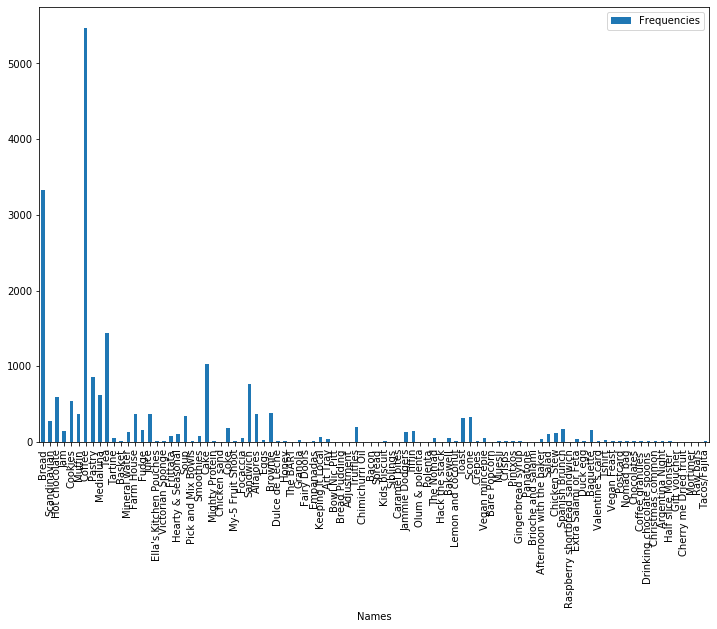

In [16]:
items_table.plot.bar(y= 'Frequencies', x='Names', figsize=(12,8))

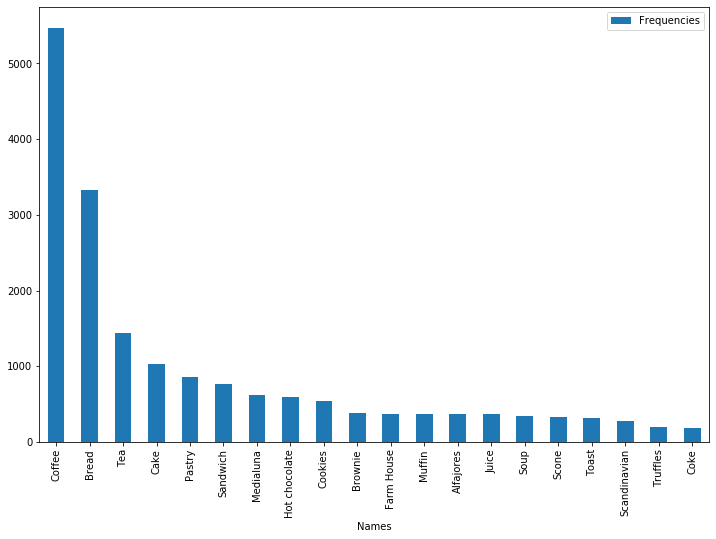

In [18]:
items_table.sort_values('Frequencies', ascending=False).head(20).\
                       plot.bar(y='Frequencies', x='Names', figsize=(12,8))

In [19]:
bread_basket_data = bread_basket_data.groupby('Transaction').agg(','.join).reset_index()
bread_basket_data = bread_basket_data.drop(['Date','Time'], axis=1)
bread_basket_data.head(10)

,Transaction,Item
0,1,Bread
1,2,"Scandinavian,Scandinavian"
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"
5,6,"Medialuna,Pastry,Muffin"
6,7,"Medialuna,Pastry,Coffee,Tea"
7,8,"Pastry,Bread"
8,9,"Bread,Muffin"
9,10,"Scandinavian,Medialuna"


In [20]:
items_data = bread_basket_data['Item']
items_data.head(10)

0                          Bread
1      Scandinavian,Scandinavian
2      Hot chocolate,Jam,Cookies
3                         Muffin
4            Coffee,Pastry,Bread
5        Medialuna,Pastry,Muffin
6    Medialuna,Pastry,Coffee,Tea
7                   Pastry,Bread
8                   Bread,Muffin
9         Scandinavian,Medialuna
Name: Item, dtype: object

In [21]:
items_list = [item.split(',') for item in items_data]
items_list_df = pd.DataFrame({'Items': items_list})
items_list_df.head(10)

,Items
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
5,"[Medialuna, Pastry, Muffin]"
6,"[Medialuna, Pastry, Coffee, Tea]"
7,"[Pastry, Bread]"
8,"[Bread, Muffin]"
9,"[Scandinavian, Medialuna]"


In [25]:
from mlxtend.preprocessing import TransactionEncoder

transencoder= TransactionEncoder()
transencoder_array = transencoder.fit(items_list).transform(items_list)

In [26]:
encoded_df = pd.DataFrame(transencoder_array, columns=transencoder.columns_)
encoded_df.head(10)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
item_support_df = apriori(encoded_df, min_support=0.01, use_colnames=True)

item_support_df.shape

(61, 2)

In [28]:
item_support_df.sample(10)

,support,itemsets
13,0.015003,(Jam)
1,0.016059,(Baguette)
16,0.061807,(Medialuna)
37,0.016904,"(Bread, Medialuna)"
36,0.013418,"(Bread, Hot chocolate)"
55,0.049868,"(Coffee, Tea)"
3,0.040042,(Brownie)
22,0.029054,(Scandinavian)
7,0.019440,(Coke)
2,0.327205,(Bread)


In [29]:
rules = association_rules(item_support_df, metric='confidence', min_threshold=0.1)
rules.shape

(44, 9)

In [30]:
rules.sample(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
36,"(Cake, Coffee)",(Bread),0.054728,0.327205,0.010037,0.183398,0.560497,-0.007870,0.823895
5,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
4,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
15,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
19,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
38,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749
6,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.003329,0.916638
9,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305


In [31]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
18,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,1
0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,1
12,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,1
24,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,1
37,"(Bread, Pastry)",(Coffee),0.029160,0.478394,0.011199,0.384058,0.802807,-0.002751,0.846843,2


In [32]:
rules[rules['antecedents'] == {'Juice'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.11675,0.002154,1.119919,1


In [33]:
rules[rules['antecedents'] == {'Cake'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,1
13,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,1
15,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,1
17,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,1


In [34]:
rules[rules['antecedents'] == {'Sandwich'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
10,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.006498,0.881503,1
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,1
32,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,1
